# TRABAJO PARA EL EXAMEN ORDINARIO



# 1



a) Elabore un programa en Python que analice los datos y calcule la desviación estándar en el eje X
y el eje Y de esas lecturas instantáneas de GPS. Grafique los datos en una gráfica xy, y las "elipses de
error" de acuerdo a una y dos desviaciones estándar. Recuerde que las elipses se definen en Matplotlib
mediante sus ejes xy y un angulo de inclinación


In [ ]:
from google.colab import drive
import xml.etree.ElementTree as ET

drive.mount('/content/drive')

kml_file_path = '/content/drive/MyDrive/Programación2/Poligono.kml'

try:
    tree = ET.parse(kml_file_path)
    root = tree.getroot()

    for placemark in root.findall('.//{http://www.opengis.net/kml/2.2}Placemark'):
        name = placemark.find('.//{http://www.opengis.net/kml/2.2}name')
        if name is not None:
            print(name.text)

except FileNotFoundError:
    print(f"Error: KML file not found at {kml_file_path}")
except ET.ParseError:
    print(f"Error: Could not parse the KML file at {kml_file_path}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Mounted at /content/drive
Polígono sin título


In [ ]:
from google.colab import drive
import xml.etree.ElementTree as ET
import math

drive.mount('/content/drive')

kml_file_path = '/content/drive/MyDrive/Programación2/Poligono.kml'

try:
    tree = ET.parse(kml_file_path)
    root = tree.getroot()

    coordinates = []
    for placemark in root.findall('.//{http://www.opengis.net/kml/2.2}Placemark'):
        for coordinates_element in placemark.findall('.//{http://www.opengis.net/kml/2.2}coordinates'):
            coords_str = coordinates_element.text.strip()
            if coords_str:
                for coord_str in coords_str.split():
                    try:
                      lon, lat, _ = map(float, coord_str.split(','))
                      coordinates.append((lon, lat))
                    except ValueError:
                        print("Invalid coordinate format:", coord_str)

    if not coordinates:
      print("No valid coordinates found in the KML file.")
    else:
      x_values = [coord[0] for coord in coordinates]
      y_values = [coord[1] for coord in coordinates]

      x_mean = sum(x_values) / len(x_values)
      y_mean = sum(y_values) / len(y_values)

      x_squared_diffs = [(x - x_mean)**2 for x in x_values]
      y_squared_diffs = [(y - y_mean)**2 for y in y_values]

      x_variance = sum(x_squared_diffs) / len(x_squared_diffs)
      y_variance = sum(y_squared_diffs) / len(y_squared_diffs)

      x_stddev = math.sqrt(x_variance)
      y_stddev = math.sqrt(y_variance)

      print(f"Standard Deviation (Longitude - X): {x_stddev}")
      print(f"Standard Deviation (Latitude - Y): {y_stddev}")

except FileNotFoundError:
    print(f"Error: KML file not found at {kml_file_path}")
except ET.ParseError:
    print(f"Error: Could not parse the KML file at {kml_file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Standard Deviation (Longitude - X): 0.0002729986479433651
Standard Deviation (Latitude - Y): 0.0002569293341181658


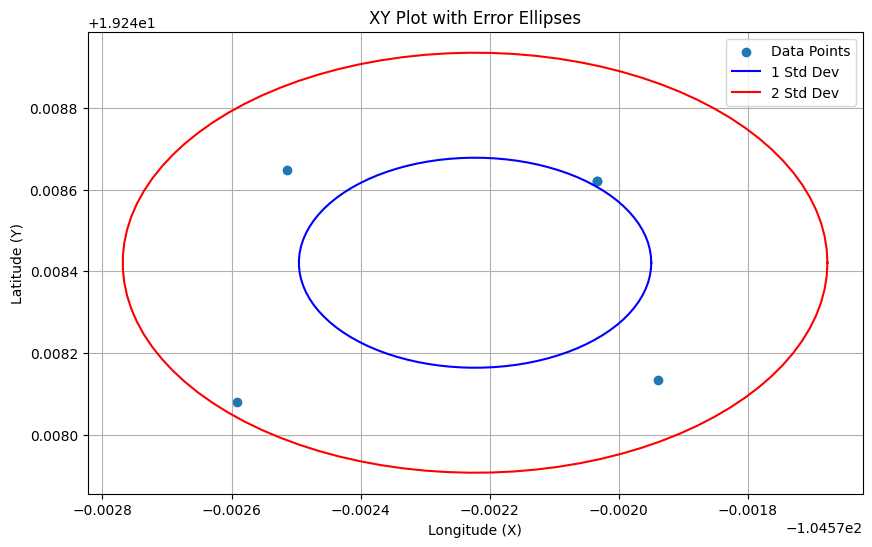

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points')

theta = np.linspace(0, 2 * np.pi, 100)
x1 = x_mean + x_stddev * np.cos(theta)
y1 = y_mean + y_stddev * np.sin(theta)
plt.plot(x1, y1, color='blue', label='1 Std Dev')

x2 = x_mean + 2*x_stddev * np.cos(theta)
y2 = y_mean + 2*y_stddev * np.sin(theta)
plt.plot(x2, y2, color='red', label='2 Std Dev')

plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.title("XY Plot with Error Ellipses")
plt.legend()
plt.grid(True)

plt.show()

b) Grafique los puntos en un mapa usando Folium o similar.

In [ ]:
!pip install folium
import folium
map_center = [y_mean, x_mean]
my_map = folium.Map(location=map_center, zoom_start=10)
for lon, lat in coordinates:
    folium.Marker([lat, lon]).add_to(my_map)
my_map

# **2**

# **3**

## a) Analizar los atributos del SHP y presentar un sumario estadístico. Por ejemplo, si fuera el de caminos: 1. cuántos tipos de caminos hay; 2. cuántos vectores hay de cada tipo de camino; 3. valores: máx. medio y mín
## b) Muestre el SHP en un mapa.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas matplotlib folium

In [ ]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo SHP cargado correctamente.

### Información General del Archivo SHP ###
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  250 non-null    geometry
dtypes: geometry(1)
memory usage: 2.1 KB

### Vista Previa de Datos ###
                                            geometry
0  LINESTRING (2342408.68 797299.915, 2342357.969...
1  LINESTRING (2313576.4 789162.856, 2313624.703 ...
2  LINESTRING (2295348.08 773201.247, 2295340.103...
3  LINESTRING (2300633.642 773385.303, 2300694.91...
4  LINESTRING (2295622.303 774432.595, 2295709.9 ...

### Tipos de Geometría ###
LineString    250
Name: count, dtype: int64

### Resumen Estadístico ###
                                                 geometry
count     

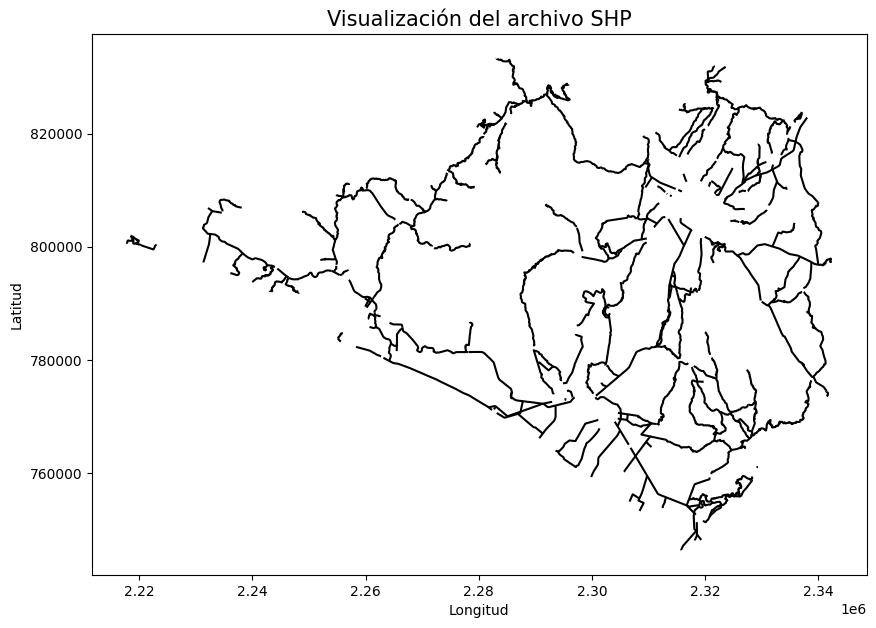

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import geopandas as gpd
import matplotlib.pyplot as plt

ruta_archivo_shp = '/content/drive/My Drive/Colima_Carretera.shp'

try:
    gdf = gpd.read_file(ruta_archivo_shp)
    print("Archivo SHP cargado correctamente.")
except Exception as e:
    print(f"Error al cargar el archivo SHP: {e}")
    gdf = None

def analizar_shp(gdf):
    if gdf is not None and not gdf.empty:
        print("\n### Información General del Archivo SHP ###")
        gdf.info()
        print("\n### Vista Previa de Datos ###")
        print(gdf.head())

        print("\n### Tipos de Geometría ###")
        print(gdf.geom_type.value_counts())

        print("\n### Resumen Estadístico ###")
        print(gdf.describe())

    else:
        print("Error: El archivo SHP no contiene datos válidos o no se cargó correctamente.")

def mostrar_mapa(gdf):
    if gdf is not None and not gdf.empty:
        gdf.plot(figsize=(10, 10), edgecolor='black')
        plt.title("Visualización del archivo SHP", fontsize=15)
        plt.xlabel("Longitud")
        plt.ylabel("Latitud")
        plt.show()
    else:
        print("Error: No se puede mostrar el mapa porque el archivo SHP no contiene datos.")

analizar_shp(gdf)
mostrar_mapa(gdf)
